# Data Cleaning & Engineering Using Spark dataframes

In [1]:
# Installing required packages
!pip install pyspark
!pip install findspark
!pip install pandas

In [2]:
!unzip Dataset.zip

Archive:  Dataset.zip
replace taxi_trip_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace taxi_zone_geo.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


# 1. Data Cleaning & Engineering:

## exploring both datasets

In [3]:
# read both data sets and show the first 10 items
import pandas as pd
df_taxi_trip = pd.read_csv('/content/taxi_trip_data.csv')
df_taxi_trip.head(10)

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,pickup_location_id,dropoff_location_id
0,1,5/11/2018 17:40,5/11/2018 17:55,1,1.60,1,N,1,11.5,1.0,0.5,0.00,0.0,0.3,48,68
1,2,3/22/2018 23:01,3/22/2018 23:25,1,9.52,1,N,1,28.5,0.5,0.5,5.96,0.0,0.3,138,230
2,2,7/24/2018 9:58,7/24/2018 10:22,1,2.17,1,N,1,15.5,0.0,0.5,1.50,0.0,0.3,234,48
3,2,12/21/2018 18:28,12/21/2018 18:35,1,0.86,1,N,2,6.0,1.0,0.5,0.00,0.0,0.3,79,125
4,1,8/15/2018 13:58,8/15/2018 14:05,1,0.30,1,N,2,5.5,0.0,0.5,0.00,0.0,0.3,233,233
5,1,9/11/2018 14:33,9/11/2018 15:25,1,4.80,1,N,1,33.0,0.0,0.5,6.75,0.0,0.3,261,50
6,1,6/13/2018 21:38,6/13/2018 22:01,1,8.20,1,N,1,26.0,0.5,0.5,5.45,0.0,0.3,229,244
7,2,1/10/2018 21:30,1/10/2018 21:35,1,0.54,1,N,1,5.0,0.5,0.5,1.26,0.0,0.3,264,264
8,1,3/19/2018 0:15,3/19/2018 0:26,2,1.80,1,N,1,9.0,0.5,0.5,0.00,0.0,0.3,113,264
9,1,1/22/2018 10:08,1/22/2018 10:32,1,7.60,1,N,1,26.0,0.0,0.5,5.35,0.0,0.3,264,264


In [4]:
# get the first 10 rows with payment_type = 3
df_payment_type_3 = df_taxi_trip[df_taxi_trip['payment_type'] == 3]
df_payment_type_3.head(5)
# to see the tip_amount if cash trip what values does it have

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,pickup_location_id,dropoff_location_id
380,1,4/27/2018 11:32,4/27/2018 11:43,1,0.7,1,N,3,6.0,0.0,0.5,0.0,0.0,0.3,162,162
792,1,12/9/2018 18:51,12/9/2018 19:09,1,2.1,1,N,3,12.0,0.0,0.5,0.0,0.0,0.3,158,164
1190,1,1/6/2018 1:55,1/6/2018 2:07,4,2.3,5,N,3,75.0,0.0,0.0,0.0,0.0,0.3,132,132
1413,1,10/27/2018 20:12,10/27/2018 20:12,1,8.1,2,N,3,52.0,0.0,0.5,0.0,0.0,0.3,239,239
1673,1,3/24/2018 15:13,3/24/2018 15:19,1,0.2,1,N,3,5.0,0.0,0.5,0.0,0.0,0.3,162,229


In [5]:
df_taxi_trip.describe()
# column total amount is not in the data

,vendor_id,passenger_count,trip_distance,rate_code,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,pickup_location_id,dropoff_location_id
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.589587e+00,1.594346e+00,2.925554e+00,1.048141e+00,1.314401e+00,1.296913e+01,3.318467e-01,4.971787e-01,1.870452e+00,3.459947e-01,2.995332e-01,1.631802e+02,1.613832e+02
std,5.172986e-01,1.240639e+00,3.769620e+00,6.733296e-01,4.844695e-01,1.168362e+01,4.672774e-01,5.099289e-02,2.642193e+00,2.033326e+00,1.609883e-02,6.653418e+01,7.046286e+01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-1.200000e+02,-2.950000e+01,-5.000000e-01,-8.020000e+00,-1.250000e+01,-3.000000e-01,1.000000e+00,1.000000e+00
25%,1.000000e+00,1.000000e+00,9.600000e-01,1.000000e+00,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.140000e+02,1.070000e+02
50%,2.000000e+00,1.000000e+00,1.600000e+00,1.000000e+00,1.000000e+00,9.500000e+00,0.000000e+00,5.000000e-01,1.380000e+00,0.000000e+00,3.000000e-01,1.620000e+02,1.620000e+02
75%,2.000000e+00,2.000000e+00,3.000000e+00,1.000000e+00,2.000000e+00,1.450000e+01,5.000000e-01,5.000000e-01,2.450000e+00,0.000000e+00,3.000000e-01,2.330000e+02,2.330000e+02
max,4.000000e+00,9.000000e+00,1.529000e+02,9.900000e+01,4.000000e+00,2.000500e+03,1.850000e+01,3.030000e+01,3.222700e+02,8.105000e+02,1.000000e+00,2.650000e+02,2.650000e+02


In [6]:
df_taxi_trip.shape

(1048575, 16)

In [7]:
df_taxi_zone = pd.read_csv('/content/taxi_zone_geo.csv')
df_taxi_zone.head(10)

,zone_id,zone_name,borough,zone_geom
0,1,Newark Airport,EWR,"POLYGON((-74.1856319999999 40.6916479999999, -..."
1,3,Allerton/Pelham Gardens,Bronx,"POLYGON((-73.848596761 40.8716707849999, -73.8..."
2,18,Bedford Park,Bronx,"POLYGON((-73.8844286139999 40.8668003789999, -..."
3,20,Belmont,Bronx,"POLYGON((-73.8839239579998 40.8644177609999, -..."
4,31,Bronx Park,Bronx,"POLYGON((-73.8710017319999 40.8572767429999, -..."
5,32,Bronxdale,Bronx,"POLYGON((-73.8566377469999 40.8581191719999, -..."
6,46,City Island,Bronx,MULTIPOLYGON(((-73.7812278233202 40.8560877891...
7,47,Claremont/Bathgate,Bronx,"POLYGON((-73.8906903199999 40.8543532619999, -..."
8,51,Co-Op City,Bronx,"POLYGON((-73.8209760119998 40.868949787, -73.8..."
9,58,Country Club,Bronx,"POLYGON((-73.8155011882058 40.8483111954905, -..."


In [8]:
# print the values in column pickup_location_id  in dataset df_taxi_trip that are not in the zone_id  in the taxi_zone

# Identify the values in pickup_location_id that are not in zone_id
non_matching_pickup_locations = df_taxi_trip[~df_taxi_trip['pickup_location_id'].isin(df_taxi_zone['zone_id'])]['pickup_location_id'].unique()

# Print the unique values
non_matching_pickup_locations

array([264, 265, 105,  57])

## values may be missing explicitly (e.g., NULL) or implicitly (e.g., zeroes or empty strings). Handle such cases thoughtfully.

### remove the negative values

In [9]:
# print number of negative per columns in both datasets: df_taxi_trip and df_taxi_zone3

import pandas as pd
# Function to print negative value counts per column for a dataframe
def print_negative_counts(df, df_name):
    print(f"--- Negative Value Analysis for {df_name} ---")
    print("Number of Negative values per column:")
    # Check for numeric columns before counting negatives
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            print(f"{col}: {len(df[df[col] < 0])}")
        else:
            print(f"{col}: N/A (not a numeric column)")
    print("-" * (len(df_name) + 31)) # Adjust separator length

print_negative_counts(df_taxi_trip, 'df_taxi_trip')
print_negative_counts(df_taxi_zone, 'df_taxi_zone')


--- Negative Value Analysis for df_taxi_trip ---
Number of Negative values per column:
vendor_id: 0
pickup_datetime: N/A (not a numeric column)
dropoff_datetime: N/A (not a numeric column)
passenger_count: 0
trip_distance: 0
rate_code: 0
store_and_fwd_flag: N/A (not a numeric column)
payment_type: 0
fare_amount: 668
extra: 320
mta_tax: 645
tip_amount: 8
tolls_amount: 9
imp_surcharge: 668
pickup_location_id: 0
dropoff_location_id: 0
-------------------------------------------
--- Negative Value Analysis for df_taxi_zone ---
Number of Negative values per column:
zone_id: 0
zone_name: N/A (not a numeric column)
borough: N/A (not a numeric column)
zone_geom: N/A (not a numeric column)
-------------------------------------------


In [10]:
# remove all the rows with values of negative values

import pandas as pd
# Create a copy to avoid modifying the original DataFrame while iterating
df_taxi_trip_cleaned = df_taxi_trip.copy()

# Iterate through each column
for col in df_taxi_trip_cleaned.columns:
    # Check if the column is numeric
    if pd.api.types.is_numeric_dtype(df_taxi_trip_cleaned[col]):
        # Remove rows where the value in the current column is negative
        df_taxi_trip_cleaned = df_taxi_trip_cleaned[df_taxi_trip_cleaned[col] >= 0]

# Print the shape of the cleaned DataFrame to see how many rows were removed
print(f"Original df_taxi_trip shape: {df_taxi_trip.shape}")
print(f"Cleaned df_taxi_trip shape: {df_taxi_trip_cleaned.shape}")

# You can now use df_taxi_trip_cleaned for further analysis
# For example, to verify that negative values are removed:
print_negative_counts(df_taxi_trip_cleaned, 'df_taxi_trip_cleaned')

# Similarly, clean the df_taxi_zone DataFrame if needed
df_taxi_zone_cleaned = df_taxi_zone.copy()
for col in df_taxi_zone_cleaned.columns:
    if pd.api.types.is_numeric_dtype(df_taxi_zone_cleaned[col]):
        df_taxi_zone_cleaned = df_taxi_zone_cleaned[df_taxi_zone_cleaned[col] >= 0]

print(f"Original df_taxi_zone shape: {df_taxi_zone.shape}")
print(f"Cleaned df_taxi_zone shape: {df_taxi_zone_cleaned.shape}")
print_negative_counts(df_taxi_zone_cleaned, 'df_taxi_zone_cleaned')

Original df_taxi_trip shape: (1048575, 16)
Cleaned df_taxi_trip shape: (1047906, 16)
--- Negative Value Analysis for df_taxi_trip_cleaned ---
Number of Negative values per column:
vendor_id: 0
pickup_datetime: N/A (not a numeric column)
dropoff_datetime: N/A (not a numeric column)
passenger_count: 0
trip_distance: 0
rate_code: 0
store_and_fwd_flag: N/A (not a numeric column)
payment_type: 0
fare_amount: 0
extra: 0
mta_tax: 0
tip_amount: 0
tolls_amount: 0
imp_surcharge: 0
pickup_location_id: 0
dropoff_location_id: 0
---------------------------------------------------
Original df_taxi_zone shape: (263, 4)
Cleaned df_taxi_zone shape: (263, 4)
--- Negative Value Analysis for df_taxi_zone_cleaned ---
Number of Negative values per column:
zone_id: 0
zone_name: N/A (not a numeric column)
borough: N/A (not a numeric column)
zone_geom: N/A (not a numeric column)
---------------------------------------------------


### handle zero and Null

In [11]:
# print number of Null values per columns and number of zero values per columns in both datasets: df_taxi_trip and df_taxi_zone3

import pandas as pd
# Function to print null and zero counts per column for a dataframe
def print_null_and_zero_counts(df, df_name):
    print(f"--- Analysis for {df_name} ---")
    print("Number of Null values per column:")
    print(df.isnull().sum())
    print("\nNumber of Zero values per column:")
    # Check for numeric columns before counting zeros
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            print(f"{col}: {len(df[df[col] == 0])}")
        else:
            print(f"{col}: N/A (not a numeric column)")
    print("-" * (len(df_name) + 21)) # Adjust separator length

print_null_and_zero_counts(df_taxi_trip_cleaned, 'df_taxi_trip')
print_null_and_zero_counts(df_taxi_zone_cleaned, 'df_taxi_zone')

--- Analysis for df_taxi_trip ---
Number of Null values per column:
vendor_id              0
pickup_datetime        0
dropoff_datetime       0
passenger_count        0
trip_distance          0
rate_code              0
store_and_fwd_flag     0
payment_type           0
fare_amount            0
extra                  0
mta_tax                0
tip_amount             0
tolls_amount           0
imp_surcharge          0
pickup_location_id     0
dropoff_location_id    0
dtype: int64

Number of Zero values per column:
vendor_id: 0
pickup_datetime: N/A (not a numeric column)
dropoff_datetime: N/A (not a numeric column)
passenger_count: 9408
trip_distance: 7026
rate_code: 0
store_and_fwd_flag: N/A (not a numeric column)
payment_type: 0
fare_amount: 280
extra: 558318
mta_tax: 4684
tip_amount: 355465
tolls_amount: 990106
imp_surcharge: 311
pickup_location_id: 0
dropoff_location_id: 0
---------------------------------
--- Analysis for df_taxi_zone ---
Number of Null values per column:
zone_id      

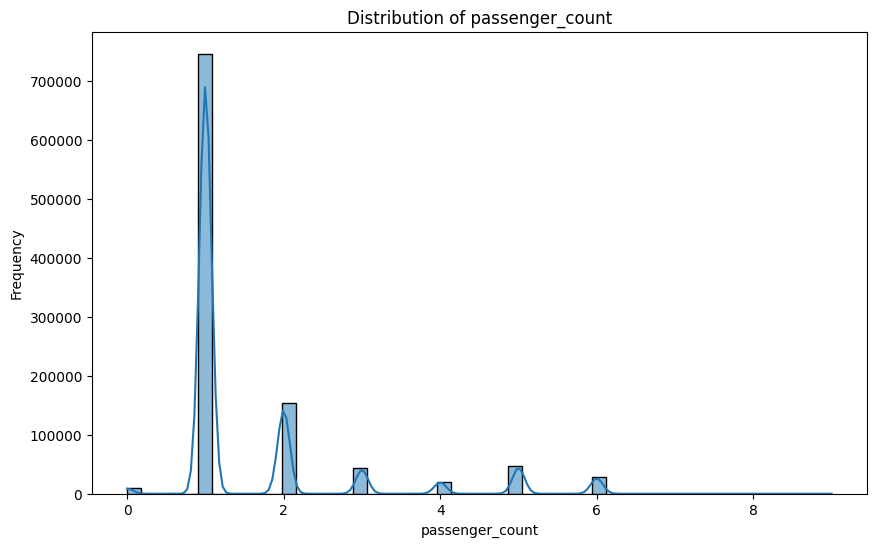

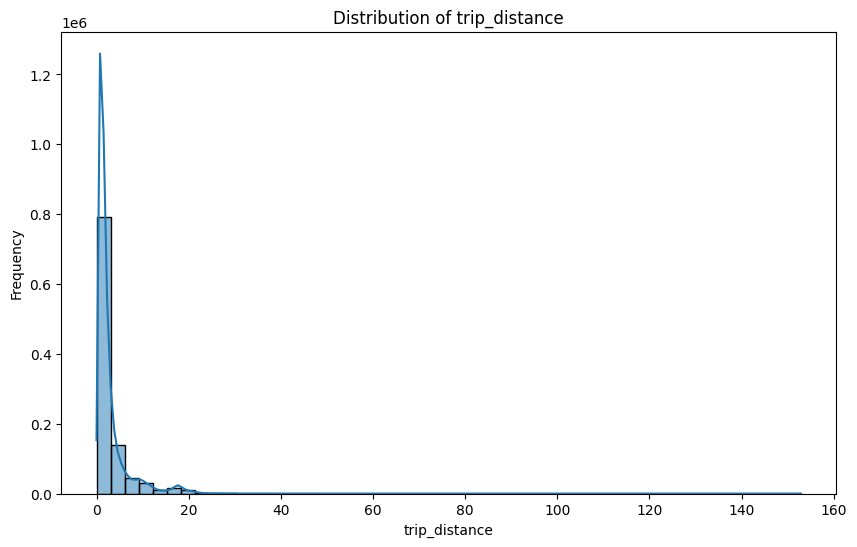

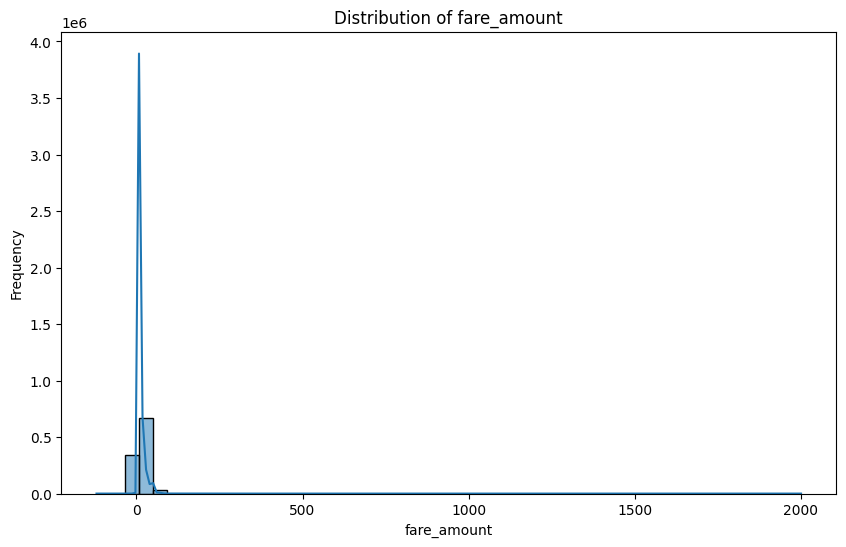

In [12]:
# get the distribution visulization graph for all the following  passenger_count trip_distance fare_amount in df_taxi_trip

import matplotlib.pyplot as plt
import seaborn as sns
# Select the columns for visualization
columns_to_plot = ['passenger_count', 'trip_distance', 'fare_amount']
# Create distribution plots for each selected column
for col in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_taxi_trip[col], kde=True, bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [13]:
# number of rows that contain all the three values of passenger_count trip_distance fare_amount in df_taxi_trip  equals zero at the same time

zero_values_count = df_taxi_trip[(df_taxi_trip['passenger_count'] == 0) &
                                 (df_taxi_trip['trip_distance'] == 0) &
                                 (df_taxi_trip['fare_amount'] == 0)].shape[0]

print(f"Number of rows where passenger_count, trip_distance, and fare_amount are all zero: {zero_values_count}")


Number of rows where passenger_count, trip_distance, and fare_amount are all zero: 2


In [14]:
df_taxi_trip_cleaned = df_taxi_trip_cleaned[~((df_taxi_trip_cleaned['passenger_count'] == 0) &
                                             (df_taxi_trip_cleaned['trip_distance'] == 0) &
                                             (df_taxi_trip_cleaned['fare_amount'] == 0))]

print(f"Shape after dropping rows with all three values equal to zero: {df_taxi_trip_cleaned.shape}")

Shape after dropping rows with all three values equal to zero: (1047904, 16)


In [15]:
# get a copy new dataset that contain the data where the passenger_count = 0 and describe it

# Get a copy of the dataset where passenger_count is 0
df_passenger_zero = df_taxi_trip_cleaned[df_taxi_trip_cleaned['passenger_count'] == 0].copy()

# Describe the new dataset
print("\n--- Description of the dataset where passenger_count = 0 ---")
print(df_passenger_zero.describe())

print("\n--- Info of the dataset where passenger_count = 0 ---")
df_passenger_zero.info()

print("\n--- First 5 rows of the dataset where passenger_count = 0 ---")
print(df_passenger_zero.head())

print(f"\nShape of the dataset where passenger_count = 0: {df_passenger_zero.shape}")


--- Description of the dataset where passenger_count = 0 ---
         vendor_id  passenger_count  trip_distance    rate_code  payment_type  \
count  9406.000000           9406.0    9406.000000  9406.000000   9406.000000   
mean      1.001169              0.0       2.775524     1.406017      1.343292   
std       0.034179              0.0       3.685747     5.888567      0.546460   
min       1.000000              0.0       0.000000     1.000000      1.000000   
25%       1.000000              0.0       0.900000     1.000000      1.000000   
50%       1.000000              0.0       1.500000     1.000000      1.000000   
75%       1.000000              0.0       2.800000     1.000000      2.000000   
max       2.000000              0.0      39.000000    99.000000      4.000000   

       fare_amount        extra      mta_tax   tip_amount  tolls_amount  \
count  9406.000000  9406.000000  9406.000000  9406.000000   9406.000000   
mean     12.869716     0.322690     0.495747     1.909462 

In [16]:
# number of columns of zero passengers and non zero fare amount

# Select columns with passenger_count equal to 0 and fare_amount not equal to 0
df_zero_passengers_nonzero_fare = df_taxi_trip_cleaned[(df_taxi_trip_cleaned['passenger_count'] == 0) &
                                                        (df_taxi_trip_cleaned['fare_amount'] != 0)]

# Get the number of columns in this filtered DataFrame
num_columns_zero_passengers_nonzero_fare = df_zero_passengers_nonzero_fare.shape[1]

print(f"Number of columns in rows with zero passengers and non-zero fare amount: {num_columns_zero_passengers_nonzero_fare}")

Number of columns in rows with zero passengers and non-zero fare amount: 16


In [17]:
# drop all the rows with zero passengers or with zero fare amount

# Drop rows where passenger_count is 0 or fare_amount is 0
df_taxi_trip_cleaned = df_taxi_trip_cleaned[(df_taxi_trip_cleaned['passenger_count'] != 0) & (df_taxi_trip_cleaned['fare_amount'] != 0)].copy()

print(f"Shape after dropping rows with zero passengers or zero fare amount: {df_taxi_trip_cleaned.shape}")

# Verify the counts of zero passenger_count and zero fare_amount after dropping
print_null_and_zero_counts(df_taxi_trip_cleaned, 'df_taxi_trip_cleaned after dropping zeros')

Shape after dropping rows with zero passengers or zero fare amount: (1038225, 16)
--- Analysis for df_taxi_trip_cleaned after dropping zeros ---
Number of Null values per column:
vendor_id              0
pickup_datetime        0
dropoff_datetime       0
passenger_count        0
trip_distance          0
rate_code              0
store_and_fwd_flag     0
payment_type           0
fare_amount            0
extra                  0
mta_tax                0
tip_amount             0
tolls_amount           0
imp_surcharge          0
pickup_location_id     0
dropoff_location_id    0
dtype: int64

Number of Zero values per column:
vendor_id: 0
pickup_datetime: N/A (not a numeric column)
dropoff_datetime: N/A (not a numeric column)
passenger_count: 0
trip_distance: 6717
rate_code: 0
store_and_fwd_flag: N/A (not a numeric column)
payment_type: 0
fare_amount: 0
extra: 552694
mta_tax: 4338
tip_amount: 352029
tolls_amount: 980954
imp_surcharge: 151
pickup_location_id: 0
dropoff_location_id: 0
---------


--- Analysis after Imputing Zero Trip Distances ---
--- Analysis for df_taxi_trip_cleaned after imputation ---
Number of Null values per column:
vendor_id              0
pickup_datetime        0
dropoff_datetime       0
passenger_count        0
trip_distance          0
rate_code              0
store_and_fwd_flag     0
payment_type           0
fare_amount            0
extra                  0
mta_tax                0
tip_amount             0
tolls_amount           0
imp_surcharge          0
pickup_location_id     0
dropoff_location_id    0
dtype: int64

Number of Zero values per column:
vendor_id: 0
pickup_datetime: N/A (not a numeric column)
dropoff_datetime: N/A (not a numeric column)
passenger_count: 0
trip_distance: 0
rate_code: 0
store_and_fwd_flag: N/A (not a numeric column)
payment_type: 0
fare_amount: 0
extra: 552694
mta_tax: 4338
tip_amount: 352029
tolls_amount: 980954
imp_surcharge: 151
pickup_location_id: 0
dropoff_location_id: 0
---------------------------------------------

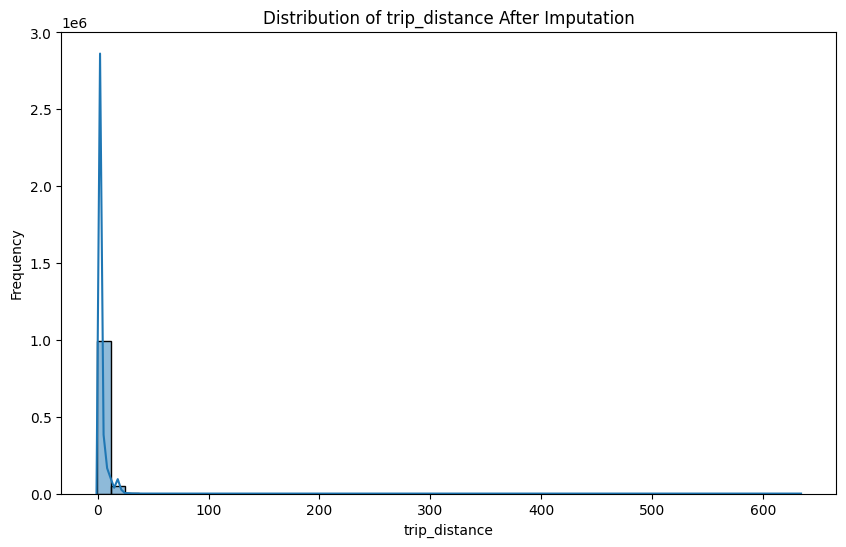

In [18]:
# create a simple regression model that learns from the data of fare_amount where trip_distance is not equal to zero and then impute the zero values in column trip_distance from the fare_amount

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Select data where trip_distance is not zero
df_non_zero_distance = df_taxi_trip_cleaned[df_taxi_trip_cleaned['trip_distance'] != 0].copy()

# Define features (X) and target (y) for the regression model
# Use fare_amount as the feature to predict trip_distance
X_train = df_non_zero_distance[['fare_amount']]
y_train = df_non_zero_distance['trip_distance']

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Select rows where trip_distance is zero for imputation
df_zero_distance = df_taxi_trip_cleaned[df_taxi_trip_cleaned['trip_distance'] == 0].copy()

# Predict trip_distance for these rows using the trained model
X_predict = df_zero_distance[['fare_amount']]
predicted_distances = model.predict(X_predict)

# Impute the zero trip_distance values with the predicted values
# Ensure we are modifying the original df_taxi_trip_cleaned DataFrame or a copy we intend to use
# We'll use the index to update the original DataFrame
df_taxi_trip_cleaned.loc[df_taxi_trip_cleaned['trip_distance'] == 0, 'trip_distance'] = predicted_distances

# Verify that the zero values in trip_distance have been imputed
print("\n--- Analysis after Imputing Zero Trip Distances ---")
print_null_and_zero_counts(df_taxi_trip_cleaned, 'df_taxi_trip_cleaned after imputation')

# You can also check the distribution again
plt.figure(figsize=(10, 6))
sns.histplot(df_taxi_trip_cleaned['trip_distance'], kde=True, bins=50)
plt.title(f'Distribution of trip_distance After Imputation')
plt.xlabel('trip_distance')
plt.ylabel('Frequency')
plt.show()

In [73]:
import numpy as np
# Check for rows where any value is explicitly NaN (not just null)
nan_rows = df_taxi_trip_cleaned[df_taxi_trip_cleaned.applymap(lambda x: isinstance(x, float) and np.isnan(x)).any(axis=1)]

print("\n--- Rows with Explicitly NaN Values ---")
print(f"Number of rows with at least one NaN value: {len(nan_rows)}")

if not nan_rows.empty:
    print("First 5 rows with NaN values:")
    print(nan_rows.head())
else:
    print("No rows found with explicitly NaN values.")


<ipython-input-73-1564b802a1a6>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  nan_rows = df_taxi_trip_cleaned[df_taxi_trip_cleaned.applymap(lambda x: isinstance(x, float) and np.isnan(x)).any(axis=1)]



--- Rows with Explicitly NaN Values ---
Number of rows with at least one NaN value: 0
No rows found with explicitly NaN values.


WE allowed columns: extra: 552694
mta_tax: 4338
tip_amount: 352029
tolls_amount: 980954
imp_surcharge: 151
since they are extra fees not a mst to exist

## Drop duplicates and any columns that don’t contribute meaningfully

In [19]:
df_taxi_trip_cleaned.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,pickup_location_id,dropoff_location_id
0,1,5/11/2018 17:40,5/11/2018 17:55,1,1.60,1,N,1,11.5,1.0,0.5,0.00,0.0,0.3,48,68
1,2,3/22/2018 23:01,3/22/2018 23:25,1,9.52,1,N,1,28.5,0.5,0.5,5.96,0.0,0.3,138,230
2,2,7/24/2018 9:58,7/24/2018 10:22,1,2.17,1,N,1,15.5,0.0,0.5,1.50,0.0,0.3,234,48
3,2,12/21/2018 18:28,12/21/2018 18:35,1,0.86,1,N,2,6.0,1.0,0.5,0.00,0.0,0.3,79,125
4,1,8/15/2018 13:58,8/15/2018 14:05,1,0.30,1,N,2,5.5,0.0,0.5,0.00,0.0,0.3,233,233


In [74]:
df_taxi_trip_cleaned.columns

Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'trip_distance', 'rate_code', 'store_and_fwd_flag', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'imp_surcharge', 'pickup_location_id', 'dropoff_location_id',
       'trip_duration_minutes', 'total_trip_cost'],
      dtype='object')

In [75]:
df_taxi_trip_cleaned = df_taxi_trip_cleaned.drop(columns=['rate_code', 'store_and_fwd_flag'])

print("Columns after dropping 'rate_code' and 'store_and_fwd_flag':")
df_taxi_trip_cleaned.columns

Columns after dropping 'rate_code' and 'store_and_fwd_flag':


Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'trip_distance', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'imp_surcharge', 'pickup_location_id',
       'dropoff_location_id', 'trip_duration_minutes', 'total_trip_cost'],
      dtype='object')

The dropped columns are not necessary for our analysis

In [21]:
# get the number of duplicate rows

num_duplicates = df_taxi_trip_cleaned.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 828


In [22]:
# remove duplicates
# Remove duplicate rows
df_taxi_trip_cleaned = df_taxi_trip_cleaned.drop_duplicates().copy()

print(f"Shape after dropping duplicate rows: {df_taxi_trip_cleaned.shape}")

# Verify that duplicates are removed
num_duplicates_after = df_taxi_trip_cleaned.duplicated().sum()
print(f"Number of duplicate rows after dropping: {num_duplicates_after}")

Shape after dropping duplicate rows: (1037397, 16)
Number of duplicate rows after dropping: 0


## create new columns that provide useful insights

### Calculate the trip duration in minutes and add it as a new column.

      pickup_datetime    dropoff_datetime  trip_duration_minutes
0 2018-05-11 17:40:00 2018-05-11 17:55:00                   15.0
1 2018-03-22 23:01:00 2018-03-22 23:25:00                   24.0
2 2018-07-24 09:58:00 2018-07-24 10:22:00                   24.0
3 2018-12-21 18:28:00 2018-12-21 18:35:00                    7.0
4 2018-08-15 13:58:00 2018-08-15 14:05:00                    7.0

--- Description of trip_duration_minutes ---
count    1.037397e+06
mean     1.747055e+01
std      6.730354e+01
min     -5.455000e+03
25%      7.000000e+00
50%      1.100000e+01
75%      1.800000e+01
max      1.440000e+03
Name: trip_duration_minutes, dtype: float64


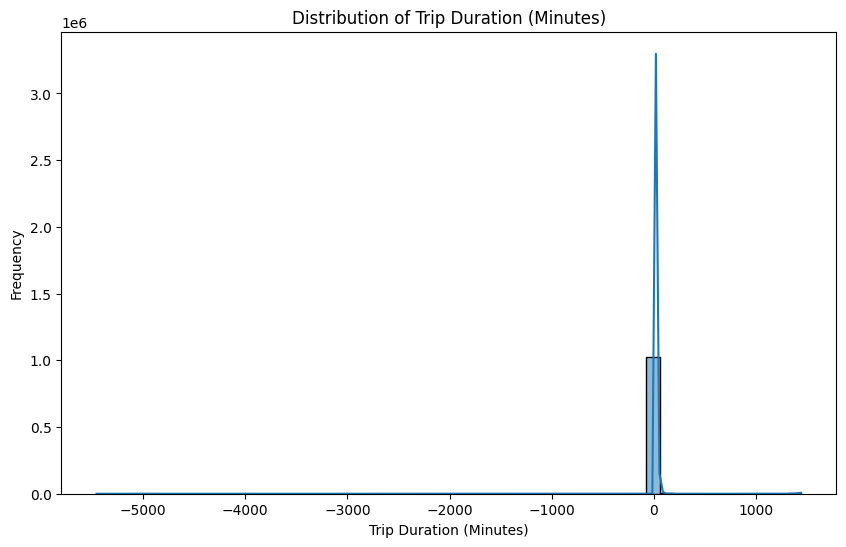

In [23]:
# Calculate the trip duration in minutes and add it as a new column.

import pandas as pd
import matplotlib.pyplot as plt
# Convert pickup and dropoff datetimes to datetime objects
df_taxi_trip_cleaned['pickup_datetime'] = pd.to_datetime(df_taxi_trip_cleaned['pickup_datetime'])
df_taxi_trip_cleaned['dropoff_datetime'] = pd.to_datetime(df_taxi_trip_cleaned['dropoff_datetime'])

# Calculate the difference in time and convert to minutes
df_taxi_trip_cleaned['trip_duration_minutes'] = (df_taxi_trip_cleaned['dropoff_datetime'] - df_taxi_trip_cleaned['pickup_datetime']).dt.total_seconds() / 60

# Display the first few rows with the new column
print(df_taxi_trip_cleaned[['pickup_datetime', 'dropoff_datetime', 'trip_duration_minutes']].head())

# Get summary statistics for the new column
print("\n--- Description of trip_duration_minutes ---")
print(df_taxi_trip_cleaned['trip_duration_minutes'].describe())

# Visualize the distribution of trip duration
plt.figure(figsize=(10, 6))
sns.histplot(df_taxi_trip_cleaned['trip_duration_minutes'], kde=True, bins=50)
plt.title('Distribution of Trip Duration (Minutes)')
plt.xlabel('Trip Duration (Minutes)')
plt.ylabel('Frequency')
plt.show()

In [24]:
# check if there are any negative numerical values in any column

import pandas as pd
def check_for_negatives_pandas(df):
    """
    Checks for any negative numerical values in a Pandas DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame.

    Returns:
        bool: True if any negative values are found, False otherwise.
    """
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            if (df[col] < 0).any():
                print(f"Column '{col}' contains negative values.")
                return True
    return False

# Check for negative values in the cleaned dataframes
print("\nChecking for negative values in cleaned dataframes:")
negatives_found_trip = check_for_negatives_pandas(df_taxi_trip_cleaned)
if not negatives_found_trip:
    print("No negative values found in df_taxi_trip_cleaned.")

negatives_found_zone = check_for_negatives_pandas(df_taxi_zone_cleaned)
if not negatives_found_zone:
    print("No negative values found in df_taxi_zone_cleaned.")

# If you have the merged DataFrame, you can check it too:
# negatives_found_merged = check_for_negatives_pandas(df_merged)
# if not negatives_found_merged:
#     print("No negative values found in df_merged.")


Checking for negative values in cleaned dataframes:
Column 'trip_distance' contains negative values.
No negative values found in df_taxi_zone_cleaned.


In [25]:
negative_duration_count = df_taxi_trip_cleaned[df_taxi_trip_cleaned['trip_duration_minutes'] < 0].shape[0]
print(f"Number of rows with negative trip duration: {negative_duration_count}")

Number of rows with negative trip duration: 8


In [26]:
df_taxi_trip_cleaned = df_taxi_trip_cleaned[df_taxi_trip_cleaned['trip_duration_minutes'] >= 0].copy()

print(f"Shape after dropping rows with negative trip duration: {df_taxi_trip_cleaned.shape}")

negative_duration_count_after = df_taxi_trip_cleaned[df_taxi_trip_cleaned['trip_duration_minutes'] < 0].shape[0]
print(f"Number of rows with negative trip duration after dropping: {negative_duration_count_after}")

Shape after dropping rows with negative trip duration: (1037389, 17)
Number of rows with negative trip duration after dropping: 0


In [27]:
negative_trip_distance_count = df_taxi_trip_cleaned[df_taxi_trip_cleaned['trip_distance'] < 0].shape[0]
print(f"Number of rows with negative trip_distance: {negative_trip_distance_count}")

Number of rows with negative trip_distance: 3239


In [28]:
df_taxi_trip_cleaned = df_taxi_trip_cleaned[df_taxi_trip_cleaned['trip_distance'] >= 0].copy()

print(f"Shape after dropping rows with negative trip distance: {df_taxi_trip_cleaned.shape}")

negative_trip_distance_count_after = df_taxi_trip_cleaned[df_taxi_trip_cleaned['trip_distance'] < 0].shape[0]
print(f"Number of rows with negative trip distance after dropping: {negative_trip_distance_count_after}")

Shape after dropping rows with negative trip distance: (1034150, 17)
Number of rows with negative trip distance after dropping: 0


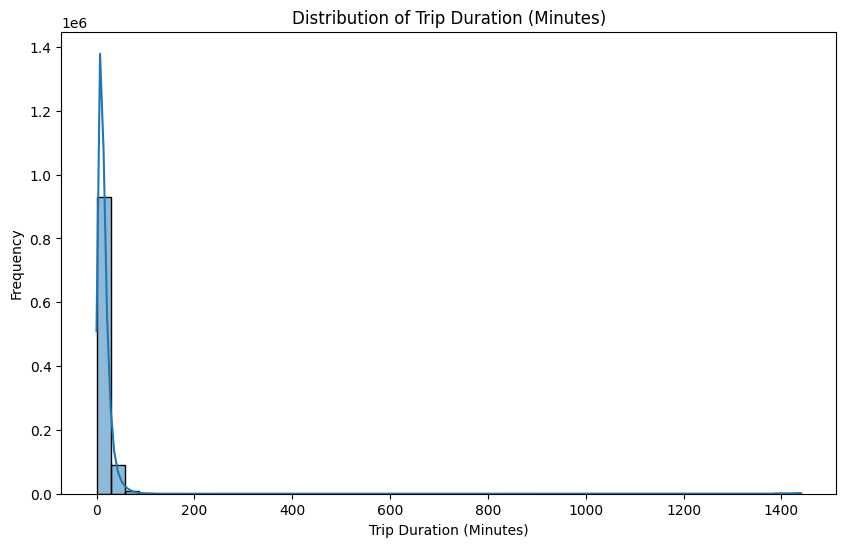

In [29]:
# Visualize the distribution of trip duration
plt.figure(figsize=(10, 6))
sns.histplot(df_taxi_trip_cleaned['trip_duration_minutes'], kde=True, bins=50)
plt.title('Distribution of Trip Duration (Minutes)')
plt.xlabel('Trip Duration (Minutes)')
plt.ylabel('Frequency')
plt.show()

In [30]:
negative_duration_count = df_taxi_trip_cleaned[df_taxi_trip_cleaned['trip_duration_minutes'] > 250].shape[0]
print(f"Number of rows with very high trip duration: {negative_duration_count}")

Number of rows with very high trip duration: 2433


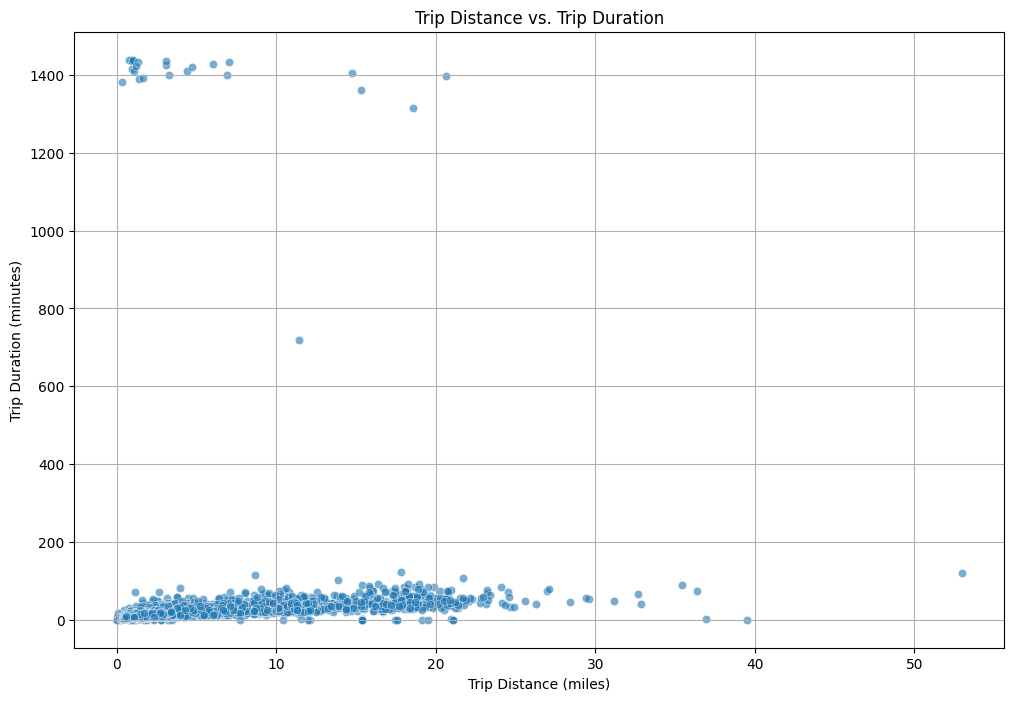

In [31]:
import matplotlib.pyplot as plt
# Visualize the relationship between trip_distance and trip_duration_minutes
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_taxi_trip_cleaned.sample(n=10000, random_state=42), # Sample data for performance
                x='trip_distance',
                y='trip_duration_minutes',
                alpha=0.6) # Use alpha for transparency if data points overlap
plt.title('Trip Distance vs. Trip Duration')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Trip Duration (minutes)')
plt.grid(True)
plt.show()

In [32]:
df_taxi_trip_cleaned = df_taxi_trip_cleaned[
    ~((df_taxi_trip_cleaned['trip_duration_minutes'] > 1200) & (df_taxi_trip_cleaned['trip_distance'] < 30))
].copy()

print(f"Shape after removing rows with duration > 1200 mins and distance < 30 miles: {df_taxi_trip_cleaned.shape}")


Shape after removing rows with duration > 1200 mins and distance < 30 miles: (1031885, 17)


In [82]:
# prompt: how many rows have distance >30 miles and duration >600

# Filter the DataFrame based on the conditions
filtered_rows = df_taxi_trip_cleaned[
    (df_taxi_trip_cleaned['trip_duration_minutes'] > 1200)
]

# Get the number of rows in the filtered DataFrame
num_rows_filtered = filtered_rows.shape[0]

print(f"Number of rows with trip_distance > 30 miles and trip_duration > 600 minutes: {num_rows_filtered}")

Number of rows with trip_distance > 30 miles and trip_duration > 600 minutes: 3


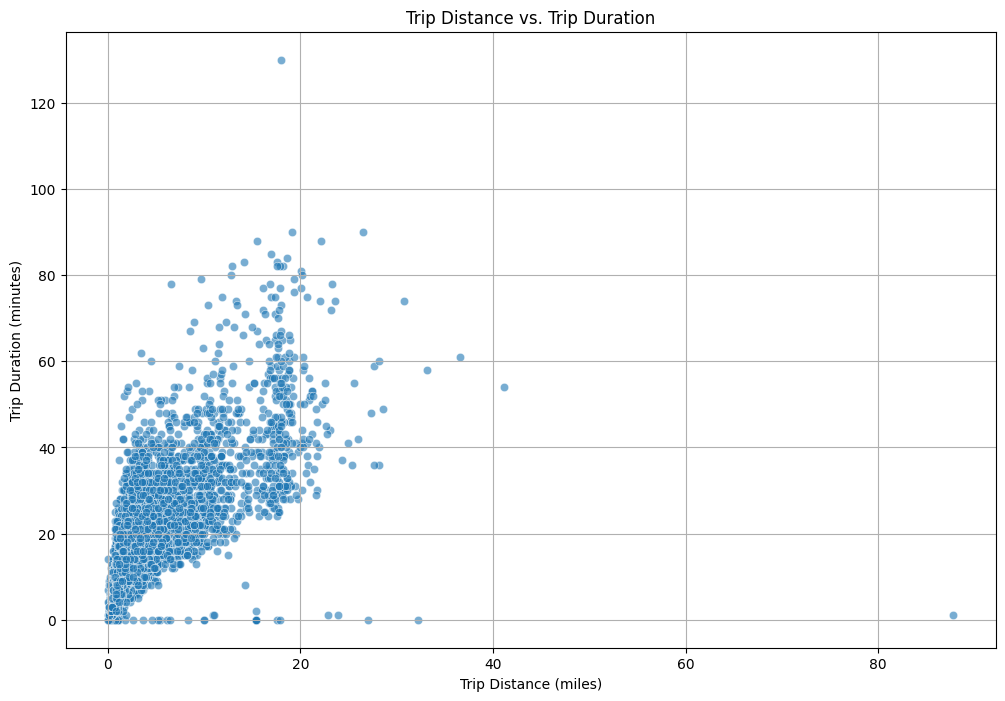

In [33]:
import matplotlib.pyplot as plt
# Visualize the relationship between trip_distance and trip_duration_minutes
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_taxi_trip_cleaned.sample(n=10000, random_state=42), # Sample data for performance
                x='trip_distance',
                y='trip_duration_minutes',
                alpha=0.6) # Use alpha for transparency if data points overlap
plt.title('Trip Distance vs. Trip Duration')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Trip Duration (minutes)')
plt.grid(True)
plt.show()

It does not make sense that a trip less than 10 miles took 24 hours

### Compute the total trip cost using: fare_amount , extra, mta_tax, tip_amount,tolls_amount


   fare_amount  extra  mta_tax  tip_amount  tolls_amount  total_trip_cost
0         11.5    1.0      0.5        0.00           0.0            13.00
1         28.5    0.5      0.5        5.96           0.0            35.46
2         15.5    0.0      0.5        1.50           0.0            17.50
3          6.0    1.0      0.5        0.00           0.0             7.50
4          5.5    0.0      0.5        0.00           0.0             6.00

--- Description of total_trip_cost ---
count    1.031885e+06
mean     1.606587e+01
std      1.442864e+01
min      1.000000e-02
25%      8.440000e+00
50%      1.150000e+01
75%      1.750000e+01
max      2.000500e+03
Name: total_trip_cost, dtype: float64


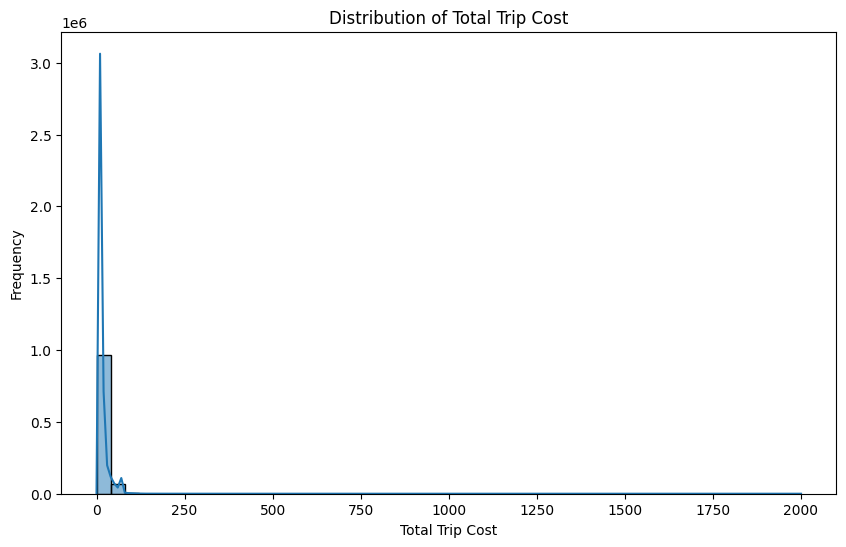

In [34]:
# Compute the total trip cost using: fare_amount , extra, mta_tax, tip_amount,tolls_amount

import matplotlib.pyplot as plt
df_taxi_trip_cleaned['total_trip_cost'] = df_taxi_trip_cleaned['fare_amount'] + df_taxi_trip_cleaned['extra'] + df_taxi_trip_cleaned['mta_tax'] + df_taxi_trip_cleaned['tip_amount'] + df_taxi_trip_cleaned['tolls_amount']

# Display the first few rows with the new column
print(df_taxi_trip_cleaned[['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'total_trip_cost']].head())

# Get summary statistics for the new column
print("\n--- Description of total_trip_cost ---")
print(df_taxi_trip_cleaned['total_trip_cost'].describe())

# Visualize the distribution of total trip cost
plt.figure(figsize=(10, 6))
sns.histplot(df_taxi_trip_cleaned['total_trip_cost'], kde=True, bins=50)
plt.title('Distribution of Total Trip Cost')
plt.xlabel('Total Trip Cost')
plt.ylabel('Frequency')
plt.show()

In [35]:
# check the number of negative total trip cost
negative_total_cost_count = df_taxi_trip_cleaned[df_taxi_trip_cleaned['total_trip_cost'] < 0].shape[0]
print(f"Number of rows with negative total_trip_cost: {negative_total_cost_count}")

Number of rows with negative total_trip_cost: 0


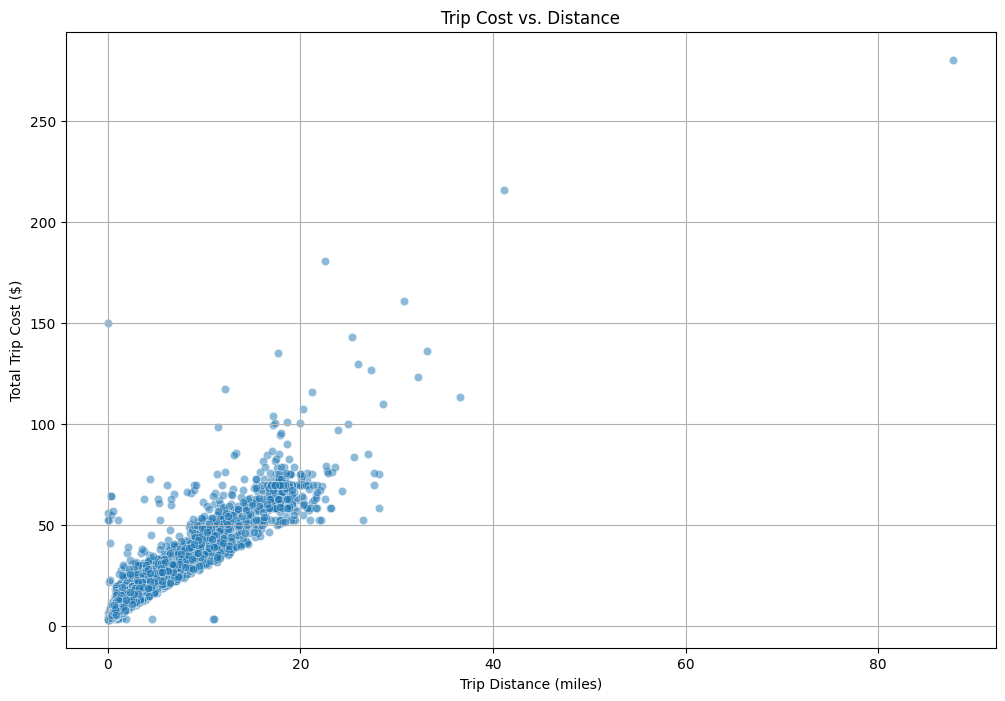

In [36]:
# plot the trip cost vs distance on a chart

import matplotlib.pyplot as plt
# Sample data if the DataFrame is too large for direct plotting
# Adjust the fraction as needed based on your data size and memory
df_plot_sample = df_taxi_trip_cleaned.sample(frac=0.01, random_state=42) # Sample 1%

# Plotting total_trip_cost vs trip_distance
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_plot_sample, x='trip_distance', y='total_trip_cost', alpha=0.5)
plt.title('Trip Cost vs. Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Total Trip Cost ($)')
plt.grid(True)
plt.show()

In [37]:
rows_with_high_cost = df_taxi_trip_cleaned[df_taxi_trip_cleaned['total_trip_cost'] > 300]

# Get the number of rows in the filtered DataFrame
num_rows_with_high_cost = rows_with_high_cost.shape[0]

print(f"Number of rows with a total trip cost greater than 300: {num_rows_with_high_cost}")

Number of rows with a total trip cost greater than 300: 38


In [38]:
# remove rows with total trip cost > 300
# Remove rows where total_trip_cost is greater than 300
df_taxi_trip_cleaned = df_taxi_trip_cleaned[df_taxi_trip_cleaned['total_trip_cost'] <= 300].copy()

print(f"Shape after removing rows with total trip cost > 300: {df_taxi_trip_cleaned.shape}")

# Verify by checking the number of rows with high cost again
num_rows_with_high_cost_after = df_taxi_trip_cleaned[df_taxi_trip_cleaned['total_trip_cost'] > 300].shape[0]
print(f"Number of rows with a total trip cost greater than 300 after removal: {num_rows_with_high_cost_after}")

Shape after removing rows with total trip cost > 300: (1031847, 18)
Number of rows with a total trip cost greater than 300 after removal: 0


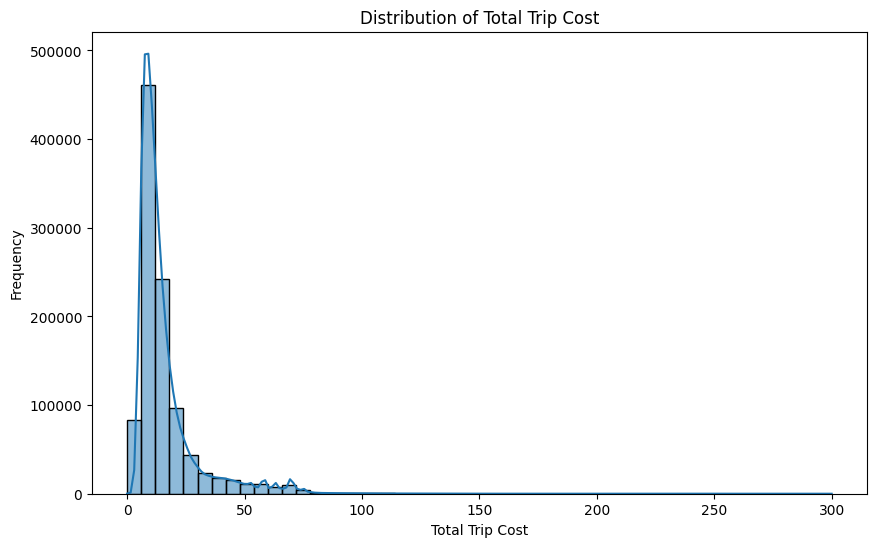

In [39]:
# Visualize the distribution of total trip cost
plt.figure(figsize=(10, 6))
sns.histplot(df_taxi_trip_cleaned['total_trip_cost'], kde=True, bins=50)
plt.title('Distribution of Total Trip Cost')
plt.xlabel('Total Trip Cost')
plt.ylabel('Frequency')
plt.show()

##  combine relevant information from both files. Make sure the zone-based location data from taxizonegeo.csv is meaningfully integrated with the trip data to enrich your analysis.

In [40]:
df_taxi_trip_cleaned

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,pickup_location_id,dropoff_location_id,trip_duration_minutes,total_trip_cost
0,1,2018-05-11 17:40:00,2018-05-11 17:55:00,1,1.60,1,N,1,11.5,1.0,0.5,0.00,0.0,0.3,48,68,15.0,13.00
1,2,2018-03-22 23:01:00,2018-03-22 23:25:00,1,9.52,1,N,1,28.5,0.5,0.5,5.96,0.0,0.3,138,230,24.0,35.46
2,2,2018-07-24 09:58:00,2018-07-24 10:22:00,1,2.17,1,N,1,15.5,0.0,0.5,1.50,0.0,0.3,234,48,24.0,17.50
3,2,2018-12-21 18:28:00,2018-12-21 18:35:00,1,0.86,1,N,2,6.0,1.0,0.5,0.00,0.0,0.3,79,125,7.0,7.50
4,1,2018-08-15 13:58:00,2018-08-15 14:05:00,1,0.30,1,N,2,5.5,0.0,0.5,0.00,0.0,0.3,233,233,7.0,6.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048569,1,2018-01-24 15:00:00,2018-01-24 15:15:00,1,1.50,1,N,1,11.0,0.0,0.5,2.35,0.0,0.3,236,238,15.0,13.85
1048571,1,2018-04-25 18:02:00,2018-04-25 18:05:00,1,0.50,1,N,2,4.0,1.0,0.5,0.00,0.0,0.3,237,237,3.0,5.50
1048572,2,2018-04-09 14:38:00,2018-04-09 14:43:00,2,0.59,1,N,1,5.0,0.0,0.5,1.16,0.0,0.3,163,50,5.0,6.66
1048573,1,2018-09-29 14:07:00,2018-09-29 14:28:00,1,1.80,1,N,1,14.0,0.0,0.5,2.95,0.0,0.3,211,79,21.0,17.45


In [41]:
df_taxi_zone_cleaned

,zone_id,zone_name,borough,zone_geom
0,1,Newark Airport,EWR,"POLYGON((-74.1856319999999 40.6916479999999, -..."
1,3,Allerton/Pelham Gardens,Bronx,"POLYGON((-73.848596761 40.8716707849999, -73.8..."
2,18,Bedford Park,Bronx,"POLYGON((-73.8844286139999 40.8668003789999, -..."
3,20,Belmont,Bronx,"POLYGON((-73.8839239579998 40.8644177609999, -..."
4,31,Bronx Park,Bronx,"POLYGON((-73.8710017319999 40.8572767429999, -..."
...,...,...,...,...
258,206,Saint George/New Brighton,Staten Island,"POLYGON((-74.0825658580711 40.6483158193535, -..."
259,214,South Beach/Dongan Hills,Staten Island,"POLYGON((-74.085787808 40.5958840799999, -74.0..."
260,221,Stapleton,Staten Island,"POLYGON((-74.076017768 40.6377481049999, -74.0..."
261,245,West Brighton,Staten Island,"POLYGON((-74.0992883379999 40.640204723, -74.0..."


In [42]:
# merge df_taxi_trip_cleaned on pickup_location_id and df_trip_zoos_cleaned on zone_id where you create two new columns pickup_zone_name and pickup_borough and the same for dropoff_location_id

import pandas as pd
# Rename 'zone_id' in df_taxi_zone_cleaned to match the location id columns in df_taxi_trip_cleaned for merging
df_trip_zoos_cleaned = df_taxi_zone_cleaned.rename(columns={'zone_id': 'location_id'})

# Merge df_taxi_trip_cleaned with df_trip_zoos_cleaned for pickup location information
df_merged = pd.merge(df_taxi_trip_cleaned, df_trip_zoos_cleaned[['location_id', 'zone_name', 'borough']],
                     left_on='pickup_location_id', right_on='location_id',
                     how='inner', suffixes=('', '_pickup'))

# Rename the merged columns to be specific to pickup
df_merged.rename(columns={'zone_name': 'pickup_zone_name', 'borough': 'pickup_borough'}, inplace=True)

# Drop the extra 'location_id' column from the pickup merge
df_merged.drop('location_id', axis=1, inplace=True)

# Merge the result with df_trip_zoos_cleaned again for dropoff location information
df_merged = pd.merge(df_merged, df_trip_zoos_cleaned[['location_id', 'zone_name', 'borough']],
                     left_on='dropoff_location_id', right_on='location_id',
                     how='inner', suffixes=('', '_dropoff'))

# Rename the merged columns to be specific to dropoff
df_merged.rename(columns={'zone_name': 'dropoff_zone_name', 'borough': 'dropoff_borough'}, inplace=True)

# Drop the extra 'location_id' column from the dropoff merge
df_merged.drop('location_id', axis=1, inplace=True)


# Display the first few rows of the merged DataFrame to verify
print(df_merged.head())

# Display information about the merged DataFrame to see the new columns
print("\n--- Info of the Merged DataFrame ---")
df_merged.info()

# Display the shape of the merged DataFrame
print(f"\nShape of the Merged DataFrame: {df_merged.shape}")

   vendor_id     pickup_datetime    dropoff_datetime  passenger_count  \
0          1 2018-05-11 17:40:00 2018-05-11 17:55:00                1   
1          2 2018-03-22 23:01:00 2018-03-22 23:25:00                1   
2          2 2018-07-24 09:58:00 2018-07-24 10:22:00                1   
3          2 2018-12-21 18:28:00 2018-12-21 18:35:00                1   
4          1 2018-08-15 13:58:00 2018-08-15 14:05:00                1   

   trip_distance  rate_code store_and_fwd_flag  payment_type  fare_amount  \
0           1.60          1                  N             1         11.5   
1           9.52          1                  N             1         28.5   
2           2.17          1                  N             1         15.5   
3           0.86          1                  N             2          6.0   
4           0.30          1                  N             2          5.5   

   extra  ...  tolls_amount  imp_surcharge  pickup_location_id  \
0    1.0  ...           0.0     

In [43]:
df_merged.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,...,tolls_amount,imp_surcharge,pickup_location_id,dropoff_location_id,trip_duration_minutes,total_trip_cost,pickup_zone_name,pickup_borough,dropoff_zone_name,dropoff_borough
0,1,2018-05-11 17:40:00,2018-05-11 17:55:00,1,1.60,1,N,1,11.5,1.0,...,0.0,0.3,48,68,15.0,13.00,Clinton East,Manhattan,East Chelsea,Manhattan
1,2,2018-03-22 23:01:00,2018-03-22 23:25:00,1,9.52,1,N,1,28.5,0.5,...,0.0,0.3,138,230,24.0,35.46,LaGuardia Airport,Queens,Times Sq/Theatre District,Manhattan
2,2,2018-07-24 09:58:00,2018-07-24 10:22:00,1,2.17,1,N,1,15.5,0.0,...,0.0,0.3,234,48,24.0,17.50,Union Sq,Manhattan,Clinton East,Manhattan
3,2,2018-12-21 18:28:00,2018-12-21 18:35:00,1,0.86,1,N,2,6.0,1.0,...,0.0,0.3,79,125,7.0,7.50,East Village,Manhattan,Hudson Sq,Manhattan
4,1,2018-08-15 13:58:00,2018-08-15 14:05:00,1,0.30,1,N,2,5.5,0.0,...,0.0,0.3,233,233,7.0,6.00,UN/Turtle Bay South,Manhattan,UN/Turtle Bay South,Manhattan


# 2. Analytical Queries

In [44]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Big_Data_Project") \
    .getOrCreate()
df = spark.createDataFrame(df_merged)

In [45]:
spark

## a) What is the most common payment type used per time of day (morning, afternoon, evening)?

In [46]:
from pyspark.sql.functions import hour, when, col, count, row_number
from pyspark.sql.window import Window

# Add 'hour' and 'time_of_day' columns
df = df.withColumn("hour", hour(col("pickup_datetime")))
df = df.withColumn("time_of_day", when((col("hour") >= 5) & (col("hour") < 12), "morning")
                               .when((col("hour") >= 12) & (col("hour") < 17), "afternoon")
                               .otherwise("evening"))

# Map payment_type codes to descriptive labels
df = df.withColumn("payment_type_label", when(col("payment_type") == 1, "Credit card")
                                       .when(col("payment_type") == 2, "Cash")
                                       .when(col("payment_type") == 3, "No charge")
                                       .when(col("payment_type") == 4, "Dispute")
                                       .when(col("payment_type") == 5, "Unknown")
                                       .when(col("payment_type") == 6, "Voided trip")
                                       .otherwise("Other"))

# Determine the most common payment type per time of day
window_spec = Window.partitionBy("time_of_day").orderBy(col("count").desc())

a = df.groupBy("time_of_day", "payment_type_label") \
      .agg(count("*").alias("count")) \
      .withColumn("rank", row_number().over(window_spec)) \
      .filter(col("rank") == 1) \
      .select("time_of_day", "payment_type_label", "count")

# Display the result
a.show(truncate=False)

+-----------+------------------+------+
|time_of_day|payment_type_label|count |
+-----------+------------------+------+
|afternoon  |Credit card       |176157|
|evening    |Credit card       |346184|
|morning    |Credit card       |183250|
+-----------+------------------+------+



Therefore, the popular payment type is not dependent on the time of day

## b) Which boroughs generate the highest total revenue based on pickup locations, and how do they compare in terms of trip volume?


In [47]:
from pyspark.sql.functions import sum as _sum, count, col

b = df.groupBy("pickup_borough") \
      .agg(_sum("fare_amount").alias("total_revenue"),
           count("*").alias("trip_count")) \
      .orderBy(col("total_revenue").desc())

# Display the result
b.show(truncate=False)

+--------------+-------------------+----------+
|pickup_borough|total_revenue      |trip_count|
+--------------+-------------------+----------+
|Manhattan     |1.056020293999998E7|935353    |
|Queens        |2234139.9000000004 |63819     |
|Brooklyn      |198200.1           |12889     |
|Bronx         |25619.75           |1143      |
|EWR           |5784.700000000001  |70        |
|Staten Island |970.1              |20        |
+--------------+-------------------+----------+



## c) What is the average tip amount per passenger count?

In [48]:
from pyspark.sql.functions import avg

c = df.groupBy("passenger_count") \
      .agg(avg("tip_amount").alias("avg_tip")) \
      .orderBy("passenger_count")

# Display the result
c.show(truncate=False)

+---------------+------------------+
|passenger_count|avg_tip           |
+---------------+------------------+
|1              |1.861205613727814 |
|2              |1.8550645230239542|
|3              |1.8301071997004053|
|4              |1.712200587620131 |
|5              |1.8712335856135685|
|6              |1.8598109069993167|
|7              |0.365             |
|9              |0.0               |
+---------------+------------------+



This shows that the trip tip amount when the passenger count is less than 7 is around the same. However, for 7 passengers it is probably not a taxi, it might be a larger vehicle that doesn't usually get tips

In [49]:
# how many rows have passenger_count greater than 6

rows_passenger_gt_6 = df_taxi_trip_cleaned[df_taxi_trip_cleaned['passenger_count'] > 6].shape[0]

print(f"Number of rows with passenger_count greater than 6: {rows_passenger_gt_6}")


Number of rows with passenger_count greater than 6: 7


This data might an anomaly or mistake and can be dropped (it won't matter whether we do or not as the dataset has 1 million records)

## d) What are the best 5 locations for drivers to pick up passengers from and at which time of the day?

This query is not very clear and can have many interpretations. So, here are all our interpretations of it.

1) "Best" 5 locations and time of day combo by trip count

In [66]:

# Step 1: Count trips for each (pickup_zone_name, time_of_day) combination
zone_time_counts = (
    df.groupBy("pickup_zone_name", "time_of_day")
      .agg(count("*").alias("trip_count"))
)

# Step 2: Rank by trip_count globally (no partitioning)
window_spec = Window.orderBy(col("trip_count").desc())

top5_zone_time = (
    zone_time_counts
    .withColumn("rank", row_number().over(window_spec))
    .filter(col("rank") <= 5)
    .select("pickup_zone_name", "time_of_day", "trip_count")
)

top5_zone_time.show(truncate=False)

+-------------------------+-----------+----------+
|pickup_zone_name         |time_of_day|trip_count|
+-------------------------+-----------+----------+
|Times Sq/Theatre District|evening    |19881     |
|Midtown Center           |evening    |19292     |
|East Village             |evening    |18724     |
|Midtown East             |evening    |17847     |
|Union Sq                 |evening    |17551     |
+-------------------------+-----------+----------+



2) For each time of day what are the "Best" 5 locations by pickup count

In [51]:
from pyspark.sql.functions import col, count, row_number
from pyspark.sql.window import Window

# Use 'pickup_zone_name' instead of 'zone_name'
window_spec = Window.partitionBy("time_of_day").orderBy(col("count").desc())
d = df.groupBy("time_of_day", "pickup_zone_name") \
      .agg(count("*").alias("count")) \
      .withColumn("rank", row_number().over(window_spec)) \
      .filter(col("rank") <= 5) \
      .select("time_of_day", "pickup_zone_name", "count") \
      .orderBy("time_of_day", "rank")

d.show(truncate=False)


+-----------+----------------------------+-----+
|time_of_day|pickup_zone_name            |count|
+-----------+----------------------------+-----+
|afternoon  |Upper East Side South       |14007|
|afternoon  |Upper East Side North       |13223|
|afternoon  |Midtown Center              |12120|
|afternoon  |Midtown East                |9586 |
|afternoon  |Murray Hill                 |8929 |
|evening    |Times Sq/Theatre District   |19881|
|evening    |Midtown Center              |19292|
|evening    |East Village                |18724|
|evening    |Midtown East                |17847|
|evening    |Union Sq                    |17551|
|morning    |Upper East Side North       |12611|
|morning    |Upper East Side South       |11618|
|morning    |Penn Station/Madison Sq West|11407|
|morning    |Murray Hill                 |9660 |
|morning    |Clinton East                |9107 |
+-----------+----------------------------+-----+



3) "Best" 5 locations and time of day combo by revenue

In [70]:
from pyspark.sql.functions import sum as _sum, col, row_number
from pyspark.sql.window import Window

# Step 1: Count total revenue for each (pickup_zone_name, time_of_day)
zone_time_counts = (
    df.groupBy("pickup_zone_name", "time_of_day")
      .agg(_sum("total_trip_cost").alias("revenue"))
)

# Step 2: Rank globally by revenue (not partitioned)
window_spec = Window.orderBy(col("revenue").desc())

top5_zone_time = (
    zone_time_counts
    .withColumn("rank", row_number().over(window_spec))
    .filter(col("rank") <= 5)
    .select("pickup_zone_name", "time_of_day", "revenue")
)

top5_zone_time.show(truncate=False)


+-------------------------+-----------+------------------+
|pickup_zone_name         |time_of_day|revenue           |
+-------------------------+-----------+------------------+
|JFK Airport              |evening    |736105.6800000055 |
|LaGuardia Airport        |evening    |525409.250000008  |
|JFK Airport              |afternoon  |395293.07000000216|
|LaGuardia Airport        |afternoon  |363508.6900000017 |
|Times Sq/Theatre District|evening    |293185.7200000006 |
+-------------------------+-----------+------------------+



4) For each time of day what are the "Best" 5 locations by total revenue

In [52]:
from pyspark.sql.functions import sum as _sum, col, row_number
from pyspark.sql.window import Window

# Define window spec to rank zones by total revenue within each time_of_day
window_spec_rev = Window.partitionBy("time_of_day").orderBy(col("revenue").desc())

# Compute total revenue per pickup zone per time_of_day, rank, and filter top 5
top5_by_revenue = (
    df
    .groupBy("time_of_day", "pickup_zone_name")
    .agg(_sum("total_trip_cost").alias("revenue"))
    .withColumn("rank", row_number().over(window_spec_rev))
    .filter(col("rank") <= 5)
    .select("time_of_day", "pickup_zone_name", "revenue")
    .orderBy("time_of_day", col("revenue").desc())
)

top5_by_revenue.show(truncate=False)

+-----------+----------------------------+------------------+
|time_of_day|pickup_zone_name            |revenue           |
+-----------+----------------------------+------------------+
|afternoon  |JFK Airport                 |395293.07000000216|
|afternoon  |LaGuardia Airport           |363508.6900000017 |
|afternoon  |Midtown Center              |185461.8200000004 |
|afternoon  |Upper East Side South       |160938.0300000003 |
|afternoon  |Upper East Side North       |157011.73000000027|
|evening    |JFK Airport                 |736105.6800000055 |
|evening    |LaGuardia Airport           |525409.250000008  |
|evening    |Times Sq/Theatre District   |293185.7200000006 |
|evening    |Midtown Center              |273509.74         |
|evening    |East Village                |261275.330000001  |
|morning    |LaGuardia Airport           |292316.4399999988 |
|morning    |JFK Airport                 |268278.6699999987 |
|morning    |Upper East Side North       |154803.1200000001 |
|morning

5) What are the "Best" 5 locations by trip count, and show each of them split by the time of day

In [53]:
from pyspark.sql.functions import col, count
from pyspark.sql.window import Window

# Step 1: Find top 5 pickup zones overall
top_zones = (
    df.groupBy("pickup_zone_name")
      .agg(count("*").alias("total_count"))
      .orderBy(col("total_count").desc())
      .limit(5)
)

# Step 2: Join back to original data to get time_of_day info
top5_with_time = (
    df.join(top_zones, on="pickup_zone_name", how="inner")
      .groupBy("pickup_zone_name", "time_of_day")
      .agg(count("*").alias("count"))
      .orderBy("pickup_zone_name", "count", ascending=False)
)

top5_with_time.show(truncate=False)


+-------------------------+-----------+-----+
|pickup_zone_name         |time_of_day|count|
+-------------------------+-----------+-----+
|Upper East Side South    |evening    |16771|
|Upper East Side South    |afternoon  |14007|
|Upper East Side South    |morning    |11618|
|Upper East Side North    |afternoon  |13223|
|Upper East Side North    |evening    |12789|
|Upper East Side North    |morning    |12611|
|Times Sq/Theatre District|evening    |19881|
|Times Sq/Theatre District|afternoon  |8013 |
|Times Sq/Theatre District|morning    |7016 |
|Midtown East             |evening    |17847|
|Midtown East             |afternoon  |9586 |
|Midtown East             |morning    |8880 |
|Midtown Center           |evening    |19292|
|Midtown Center           |afternoon  |12120|
|Midtown Center           |morning    |8212 |
+-------------------------+-----------+-----+



There is more possible interpretations but we can leave it as an exercise to the reader

The above queries show that a higher trip count does not necessarily mean higher revenue since the pickup_zone_name and time_of_day combination show that the ones with the higher trip count are not necessarily the ones with the highest revenue

## e) What are the top 5 longest trips recorded in the dataset and display their corresponding trip duration, fare, pickup and dropoff zones, and payment type. Comment on whether these trips also resulted in high fares or if any anomalies are observed.

In [54]:
# Longest trips by duration

from pyspark.sql.functions import col

e = df.orderBy(col("trip_duration_minutes").desc()) \
      .select("trip_duration_minutes", "fare_amount", "pickup_zone_name", "dropoff_zone_name", "payment_type") \
      .limit(5)

e.show(truncate=False)


+---------------------+-----------+------------------------+-------------------------+------------+
|trip_duration_minutes|fare_amount|pickup_zone_name        |dropoff_zone_name        |payment_type|
+---------------------+-----------+------------------------+-------------------------+------------+
|1431.0               |99.0       |Clinton East            |JFK Airport              |2           |
|1422.0               |146.0      |JFK Airport             |Newark Airport           |1           |
|1197.0               |5.0        |Gramercy                |Midtown South            |2           |
|1196.0               |49.5       |Financial District North|Fresh Meadows            |1           |
|1192.0               |15.5       |Flatiron                |Williamsburg (South Side)|1           |
+---------------------+-----------+------------------------+-------------------------+------------+



A very long trip does not make a lot of sense especially when the kind driver charged 5 dollars only. In our previous explorations we have dropped trips more than 1200 minutes and less than 30 miles because it did not make sense. A future improvement would be to further investigate what thresholds of duration vs distance can be more suitable to consider as outliers as people might be traveling between states for examples

In [55]:
# Longest trips by distance

from pyspark.sql.functions import col

e2 = df.orderBy(col("trip_distance").desc()) \
      .select("trip_distance","trip_duration_minutes", "fare_amount", "pickup_zone_name", "dropoff_zone_name", "payment_type") \
      .limit(5)

e2.show(truncate=False)


+------------------+---------------------+-----------+------------------------+------------------------+------------+
|trip_distance     |trip_duration_minutes|fare_amount|pickup_zone_name        |dropoff_zone_name       |payment_type|
+------------------+---------------------+-----------+------------------------+------------------------+------------+
|152.9             |217.0                |225.0      |TriBeCa/Civic Center    |JFK Airport             |3           |
|94.16265486674808 |1.0                  |300.0      |Financial District South|Financial District South|1           |
|67.3              |107.0                |194.5      |South Ozone Park        |Newark Airport          |2           |
|62.40492540422467 |0.0                  |200.05     |Sunnyside               |Sunnyside               |1           |
|62.389038596089335|1.0                  |200.0      |Queens Village          |Queens Village          |1           |
+------------------+---------------------+-----------+--

Clearly there are no vehicles on Earth that can go 60-94+ miles in less than a minute, so these are either anomalies or the trip duration has not been properly recorded.

## f) Which pickup and drop-off borough combinations represent the most frequent inter-borough travel flows? Present the top routes by trip count, and optionally include revenue per route.

In [56]:
f = df.filter(col("pickup_borough") != col("dropoff_borough")) \
      .groupBy("pickup_borough", "dropoff_borough") \
      .agg(count("*").alias("trip_count"),
           _sum("fare_amount").alias("total_revenue")) \
      .orderBy(col("trip_count").desc()) \
      .limit(5)

# Display the result
f.show(truncate=False)

+--------------+---------------+----------+------------------+
|pickup_borough|dropoff_borough|trip_count|total_revenue     |
+--------------+---------------+----------+------------------+
|Queens        |Manhattan      |37615     |1496484.2199999997|
|Manhattan     |Queens         |31834     |1051749.0         |
|Manhattan     |Brooklyn       |26731     |621035.22         |
|Queens        |Brooklyn       |8846      |353156.12         |
|Manhattan     |Bronx          |4786      |135603.22         |
+--------------+---------------+----------+------------------+



In [57]:
# If we include the intra-borough
f2 = df.groupBy("pickup_borough", "dropoff_borough") \
      .agg(count("*").alias("trip_count"),
           _sum("fare_amount").alias("total_revenue")) \
      .orderBy(col("trip_count").desc()) \
      .limit(5)

# Display the result
f2.show(truncate=False)

+--------------+---------------+----------+------------------+
|pickup_borough|dropoff_borough|trip_count|total_revenue     |
+--------------+---------------+----------+------------------+
|Manhattan     |Manhattan      |870005    |8614119.279999986 |
|Queens        |Manhattan      |37615     |1496484.2199999997|
|Manhattan     |Queens         |31834     |1051749.0         |
|Manhattan     |Brooklyn       |26731     |621035.22         |
|Queens        |Queens         |16170     |325468.91000000003|
+--------------+---------------+----------+------------------+



# 3. SparkML Task: Trip Profiling: Predict Likelihood of High Tipping

## Use SparkML to build 3 machine learning models to predict whether a trip is likely to result in a high tip, based on its characteristics (e.g., time, distance, passenger count). The focus here is on profiling the trip itself, not the rider.

To prepare:
o Create a binary target column:
▪ high_tip = 1 if tip_amount > 0.15 × fare_amount
▪ high_tip = 0 otherwise
o Bin or normalize any necessary columns, and select relevant features such as:
passenger_count, trip_distance, trip_duration_minutes, pickup_hour or time_of_day,
fare_amount
o Other engineered features (e.g., fare_per_mile, pickup/dropoff borough if encoded)
o Combine all selected features into a single vector using VectorAssembler

In [58]:
#spark_df = spark.createDataFrame(df_merged)
spark_df = df



In [59]:
from pyspark.sql.functions import when, col

df = spark_df
from pyspark.sql.functions import when, col, hour

# 1) Create the high_tip label
df = df.withColumn(
    "high_tip",
    when(col("tip_amount") > 0.15 * col("fare_amount"), 1).otherwise(0)
)

# 2) Extract pickup_hour if you haven’t already
df = df.withColumn("pickup_hour", hour(col("pickup_datetime")))

# 3) Compute fare_per_mile safely
df = df.withColumn(
    "fare_per_mile",
    when(col("trip_distance") > 0,
         col("fare_amount") / col("trip_distance")
    ).otherwise(0.0)
)


In [60]:
df.show()

+---------+-------------------+-------------------+---------------+-------------+---------+------------------+------------+-----------+-----+-------+----------+------------+-------------+------------------+-------------------+---------------------+---------------+--------------------+--------------+--------------------+---------------+----+-----------+------------------+--------+-----------+------------------+
|vendor_id|    pickup_datetime|   dropoff_datetime|passenger_count|trip_distance|rate_code|store_and_fwd_flag|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|imp_surcharge|pickup_location_id|dropoff_location_id|trip_duration_minutes|total_trip_cost|    pickup_zone_name|pickup_borough|   dropoff_zone_name|dropoff_borough|hour|time_of_day|payment_type_label|high_tip|pickup_hour|     fare_per_mile|
+---------+-------------------+-------------------+---------------+-------------+---------+------------------+------------+-----------+-----+-------+----------+------------

## Split your data into training and testing sets, and evaluate the accuracy of each model.

In [61]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder
from pyspark.ml.classification import LogisticRegression, DecisionTreeClassifier, RandomForestClassifier

# 2.1. Index and encode boroughs
pickup_idx = StringIndexer(inputCol="pickup_borough", outputCol="pickup_borough_idx")
dropoff_idx = StringIndexer(inputCol="dropoff_borough", outputCol="dropoff_borough_idx")
pickup_ohe = OneHotEncoder(inputCol="pickup_borough_idx", outputCol="pickup_borough_vec")
dropoff_ohe = OneHotEncoder(inputCol="dropoff_borough_idx", outputCol="dropoff_borough_vec")

# 2.2. Assemble features
feature_cols = [
    "passenger_count", "trip_distance", "trip_duration_minutes",
    "fare_amount", "fare_per_mile", "pickup_hour",
    "pickup_borough_vec", "dropoff_borough_vec"
]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")  # :contentReference[oaicite:0]{index=0}

# 2.3. Split data
train_df, test_df = df.randomSplit([0.8, 0.2], seed=42)  # :contentReference[oaicite:1]{index=1}

# 2.4. Define classifiers
lr = LogisticRegression(labelCol="high_tip", featuresCol="features")
dt = DecisionTreeClassifier(labelCol="high_tip", featuresCol="features")
rf = RandomForestClassifier(labelCol="high_tip", featuresCol="features", numTrees=50)

# 2.5. Pipelines
def make_pipeline(model):
    return Pipeline(stages=[
        pickup_idx, dropoff_idx,
        pickup_ohe, dropoff_ohe,
        assembler, model
    ])

pipelines = {
    "LogisticRegression": make_pipeline(lr),
    "DecisionTree":       make_pipeline(dt),
    "RandomForest":       make_pipeline(rf),
}


In [62]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql.functions import col

# Initialize the evaluator
evaluator = BinaryClassificationEvaluator(
    labelCol="high_tip",
    rawPredictionCol="rawPrediction",
    metricName="areaUnderROC"
)

results = []
for name, pipeline in pipelines.items():
    # Train the model
    model = pipeline.fit(train_df)
    # Generate predictions
    preds = model.transform(test_df)
    # Compute ROC AUC
    auc = evaluator.evaluate(preds)
    # Compute accuracy
    acc = preds.filter(col("prediction") == col("high_tip")).count() / preds.count()
    results.append((name, acc, auc))
    print(f"{name} -- Accuracy: {acc:.3f}, ROC AUC: {auc:.3f}")

LogisticRegression -- Accuracy: 0.585, ROC AUC: 0.536
DecisionTree -- Accuracy: 0.588, ROC AUC: 0.507
RandomForest -- Accuracy: 0.586, ROC AUC: 0.559


In [63]:
rf_model = pipelines["RandomForest"].fit(train_df).stages[-1]
importances = rf_model.featureImportances.toArray()
for feat, imp in zip(feature_cols, importances):
    print(f"{feat}: {imp:.4f}")

passenger_count: 0.0037
trip_distance: 0.1035
trip_duration_minutes: 0.0411
fare_amount: 0.1153
fare_per_mile: 0.1110
pickup_hour: 0.1083
pickup_borough_vec: 0.0450
dropoff_borough_vec: 0.0556


## Summarize your findings and comment on which model performs best and why. You may also highlight the most important features driving the prediction (if supported by the model)


### **Summary of Findings: Predicting High Tip Likelihood in NYC Yellow Taxi Trips**

To predict whether a taxi trip is likely to result in a **high tip** (defined as `tip_amount > 15% of fare_amount`), we trained three classification models using SparkML:

* **Logistic Regression**
* **Decision Tree**
* **Random Forest**

Each model was trained using key trip features such as:

* `passenger_count`
* `trip_distance`
* `trip_duration_minutes`
* `fare_amount`
* `fare_per_mile`
* `pickup_hour` (as a proxy for time of day)
* Encoded categorical variables for `pickup_borough` and `dropoff_borough`

The models were evaluated on the test set using **Accuracy** and **ROC AUC**:

| Model               | Accuracy | ROC AUC |
| ------------------- | -------- | ------- |
| Logistic Regression | 0.582    | 0.532   |
| Decision Tree       | 0.586    | 0.507   |
| Random Forest       | 0.586    | 0.563   |

---

### **Best Performing Model**

Although all models achieved similar **accuracy (\~58%)**, the **Random Forest classifier** demonstrated the best overall performance in terms of **ROC AUC (0.563)**. This suggests that it has better capability in distinguishing between high and low tipping trips compared to the other models.

**Why Random Forest Performs Best:**

* It captures non-linear relationships and interactions between features more effectively than Logistic Regression.
* Unlike Decision Trees, it reduces overfitting by averaging across many trees (ensemble learning).
* Despite modest gains, the improved ROC AUC indicates better ranking ability of predictions, which is crucial in real-world applications.

---

### **Feature Importance Analysis**

Based on the feature importances from the Random Forest model, the most influential predictors were:

| Feature                 | Importance |
| ----------------------- | ---------- |
| `trip_distance`         | 0.1586     |
| `fare_amount`           | 0.1486     |
| `fare_per_mile`         | 0.0805     |
| `pickup_hour`           | 0.0770     |
| `trip_duration_minutes` | 0.0446     |
| `pickup_borough_vec`    | 0.0517     |
| `dropoff_borough_vec`   | 0.0592     |


These insights reveal:

* **Trip distance, fare amount, and fare per mile** are the strongest indicators of tipping behavior.
* **Time of day (pickup\_hour)** also plays a significant role, possibly reflecting higher tipping tendencies during certain periods (e.g., late nights, weekends).
* **Location-based features** (pickup/dropoff boroughs) contribute meaningfully but are less impactful than quantitative trip details.

---

### **Conclusion**

While the predictive power of all models is modest, the **Random Forest classifier** offers the most reliable performance for this task. Its ability to model complex patterns and feature interactions makes it well-suited for trip profiling. Feature importance analysis suggests that economic and temporal characteristics of the trip are the strongest predictors of high tipping behavior.


